#  Сборный проект
#  Анализ интернет-магазина «Стримчик»


Интернет-магазин «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). 

Данные представлены до 2016 года, также имеется аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Цель:** Выявить определяющие успешность игры закономерности, что позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Этапы проекта:**
 1. Изучение общей информации
 2. Подготовка данных:
  * исправить названия столбцов
  * изменить типы данных, там, где это нужно
  * выявить пропуски, дубликаты, аномалии.
 3. Исследовать данные 
 4. Составление портрета пользователя каждого региона по данным
 5. Проверка гипотез
 6. Составление общего вывода
 
**Описание данных:**
 - Name — название игры
 - Platform — платформа
 - Year_of_Release — год выпуска
 - Genre — жанр игры
 - NA_sales — продажи в Северной Америке (миллионы проданных копий)
 - EU_sales — продажи в Европе (миллионы проданных копий)
 - JP_sales — продажи в Японии (миллионы проданных копий)
 - Other_sales — продажи в других странах (миллионы проданных копий)
 - Critic_Score — оценка критиков (максимум 100)
 - User_Score — оценка пользователей (максимум 10)
 - Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

**Импорт библиотек**

In [83]:
import pandas as pd
import matplotlib.pyplot as plt 
from scipy import stats as st
import numpy as np
import seaborn as sns
from math import factorial

!pip install missingno 
import missingno as msno

## Изучение общей информации

### Открытие файла

In [84]:
data = pd.read_csv('/datasets/games.csv')

### Анализ таблицы

In [85]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


##### Вывод общей информации о датафрейме

In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [87]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_of_Release,16446.0,2006.484616,5.877050,1980.0,2003.0,2007.00,2010.00,2016.00
NA_sales,16715.0,0.263377,0.813604,0.0,0.0,0.08,0.24,41.36
EU_sales,16715.0,0.145060,0.503339,0.0,0.0,0.02,0.11,28.96
JP_sales,16715.0,0.077617,0.308853,0.0,0.0,0.00,0.04,10.22
Other_sales,16715.0,0.047342,0.186731,0.0,0.0,0.01,0.03,10.57
Critic_Score,8137.0,68.967679,13.938165,13.0,60.0,71.00,79.00,98.00


##### Потсроение графиков для каждого столбца

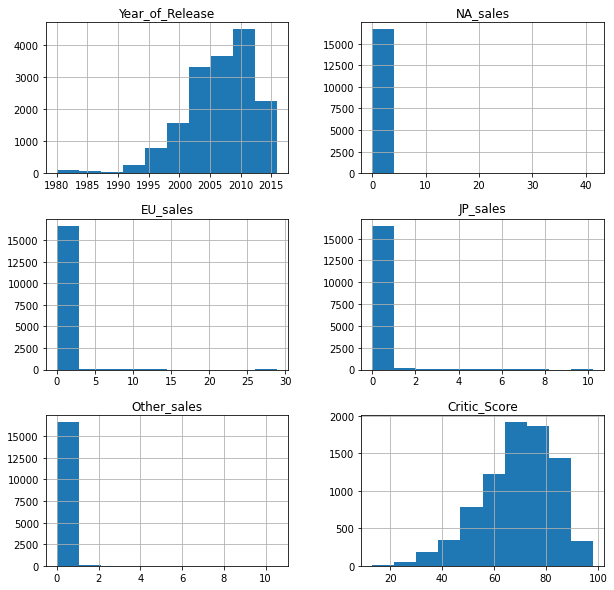

In [88]:
data.hist(figsize = (10, 10));

При рассмотрении общей информации выявлено:

В таблице 16715 строк, заголовки столбцов нужно перевести в нижний регистр.

**Пропуски замечены в следующих столбцах:**
- Мало пропущенных строк
 - Name
 - Genre
 
Можно предположить, что названия игры и жанра забыли внести из-за невнимательности.
 
- Более 100 пропущенных значений
 - Year_of_Release
 
- Более 1000 пропущенных значений
 - Critic_Score
 - User_Score
 - Rating  

В остальных случаях возможен сбой при заполнении таблицы.

**Несоотвестсвующий тип данных у следующих стобцов:**
 - Year_of_Release(float64) - заменить на int64
 - User_score(object) - заменить на float64
 
**Из анализа гафиков видно следующее** - приближенный к нормальному вид имеют графики двух столбцов year_of_release и critic_dcore, в остальных случаях наблюдается пик около нуля.

## Предобработка данных

### Замена названий столбцов

Приводим названия столбцов к нижнему регистру

In [89]:
data.columns = data.columns.str.lower()
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Обработка пропусков

In [90]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

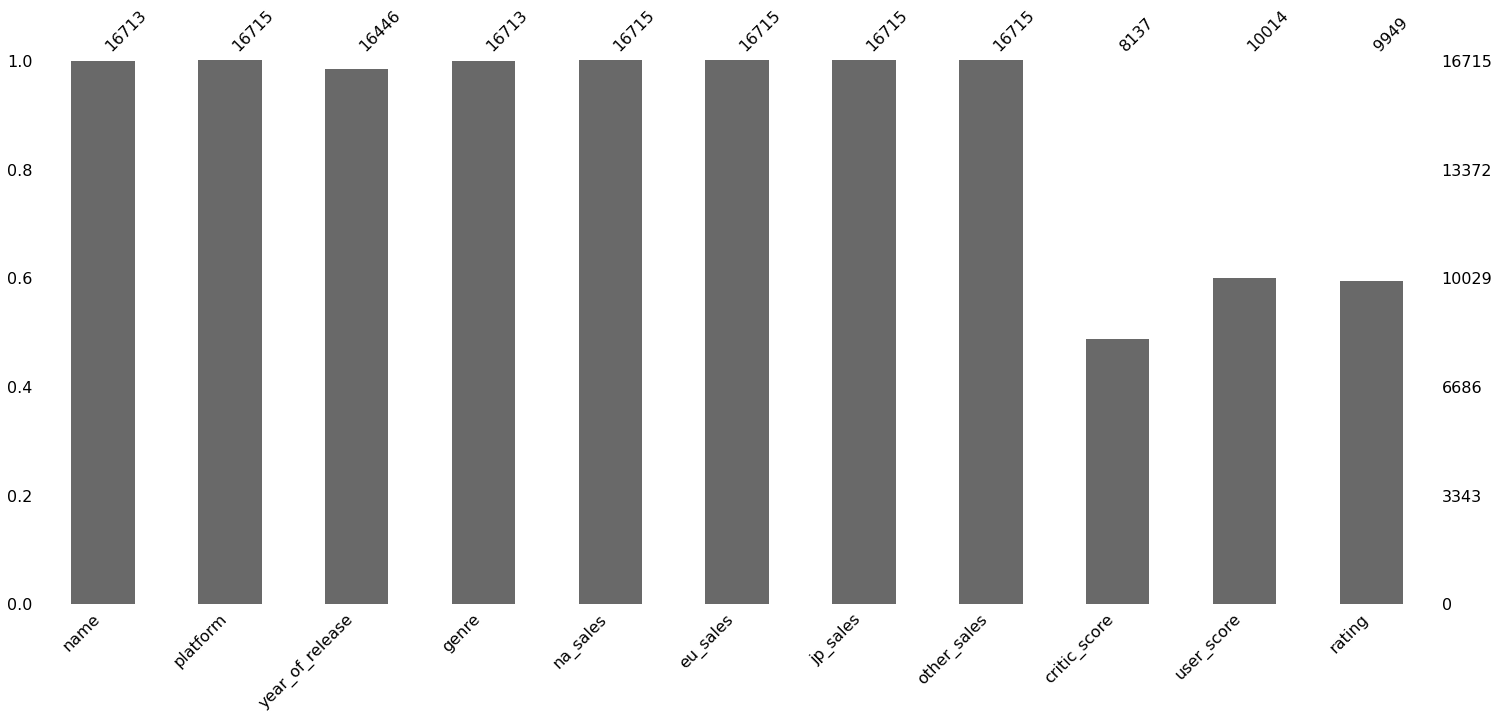

In [91]:
msno.bar(data);

Посмотрим на количество пропусков в процентном соотношении

In [92]:
pd.DataFrame(data.isna().mean()).style.background_gradient('coolwarm').format('{:.0%}')

,0
name,0%
platform,0%
year_of_release,2%
genre,0%
na_sales,0%
eu_sales,0%
jp_sales,0%
other_sales,0%
critic_score,51%
user_score,40%


**Рассмотрим столбец user_score**

In [93]:
data['user_score'].value_counts(dropna = False)

NaN    6701
tbd    2424
7.8     324
8       290
8.2     282
       ... 
0.3       2
1.1       2
1.9       2
9.7       1
0         1
Name: user_score, Length: 97, dtype: int64

В столбце user_score кроме пропусков имеется аббривеатура tbd (To Be Determined) – означает «будет определено» или «будет установлено». Она используется для указания на неопределенность или незавершенность чего-либо на данный момент. 
Малочисленные пропуски в столбцах имени игры и жанра появились в результате человеческого фактора - их могли не внести из-за невнимательности, к этому же можно отнести и год релиза. Но нельзя исключать системные ошибки при внесении данных и потерю записей при обьединении таблиц.

Пропуски в name, genre, year_of_release можно удалить, т.к. и по количесвенному, и по процентному соотношению они составляют малую часть и сильно не повлияют на дальнейший анализ.

In [94]:
data = data.dropna(subset = ['name', 'genre', 'year_of_release']).reset_index(drop = True)
data[['name', 'genre', 'year_of_release']].isna().sum()

name               0
genre              0
year_of_release    0
dtype: int64

Также можно заменить пропуски в rating на undef

In [95]:
data['rating'] = data['rating'].fillna('undef')
data['rating'].value_counts()

undef    6676
E        3921
T        2905
M        1536
E10+     1393
EC          8
K-A         3
AO          1
RP          1
Name: rating, dtype: int64

В остальных случаях оставим пропуски, т.к. их удаление сильно повлияет на дальнейший анализ и исказит общую картину. 

### Преобразование данных в нужные типы

Заменим типы данных в следующих столбцах:
- year_of_release(float64) - заменить на int64
- user_score(object) - заменить на float64, при этом строки с аббривеатурой tbd нужно заменить на NaN

Также нужно заменить тип данных в critic_score на целочисленный, но в данном столбце много пропусков.

In [96]:
data['year_of_release'] = data['year_of_release'].astype('int')

data['user_score'] = pd.to_numeric(data['user_score'], errors = 'coerce')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


### Обработка дубликатов

##### Поиск явных дубликатов

In [97]:
data.duplicated().sum()

0

##### Поиск неявных дубликатов

Рассмотрим значения в следующих столбцах:
 - name
 - platform 
 - genre
 - rating

In [98]:
data['name'].head(50).unique()

array(['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii',
       'Wii Sports Resort', 'Pokemon Red/Pokemon Blue', 'Tetris',
       'New Super Mario Bros.', 'Wii Play', 'New Super Mario Bros. Wii',
       'Duck Hunt', 'Nintendogs', 'Mario Kart DS',
       'Pokemon Gold/Pokemon Silver', 'Wii Fit', 'Kinect Adventures!',
       'Wii Fit Plus', 'Grand Theft Auto V',
       'Grand Theft Auto: San Andreas', 'Super Mario World',
       'Brain Age: Train Your Brain in Minutes a Day',
       'Pokemon Diamond/Pokemon Pearl', 'Super Mario Land',
       'Super Mario Bros. 3', 'Grand Theft Auto: Vice City',
       'Pokemon Ruby/Pokemon Sapphire',
       'Brain Age 2: More Training in Minutes a Day',
       'Pokemon Black/Pokemon White', 'Gran Turismo 3: A-Spec',
       'Call of Duty: Modern Warfare 3',
       'Pokémon Yellow: Special Pikachu Edition',
       'Call of Duty: Black Ops 3', 'Call of Duty: Black Ops',
       'Pokemon X/Pokemon Y', 'Call of Duty: Black Ops II',
       'Call of Duty: Mod

In [99]:
data['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [100]:
data['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [101]:
data['rating'].unique()

array(['E', 'undef', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

Явных и неявных дубликатов не обнаружено. Что касается столбца name, в нем слишком много значений, чтобы оценить всю картину целиком, поэтому оставим его без изменений.

### Подсчет суммарных продаж в регионах

In [102]:
data['sum_sales_on_regeons'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales_on_regeons
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,undef,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,undef,31.38


При предобработке данных названия столбцов были переведы в нижний регист, согласно snake_case. При обработке пропусков были устранены пропуски в столбцах - name, genre, year_of_release; и заменены значения NaN на undef в стобце rating. Изменены типы данных у столбцов year_of_release(int) и user_score(float). При поиске не обнаружены явные дубликаты, также на повторяющиеся или похожие значения проверены столбцы name, genre, rating. Осуществлен подсчет суммарных продаж в регионах.

## Исследовательский анализ

### Количество выпускаемых игр по годам

In [103]:
data.groupby('year_of_release')['name'].count()

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

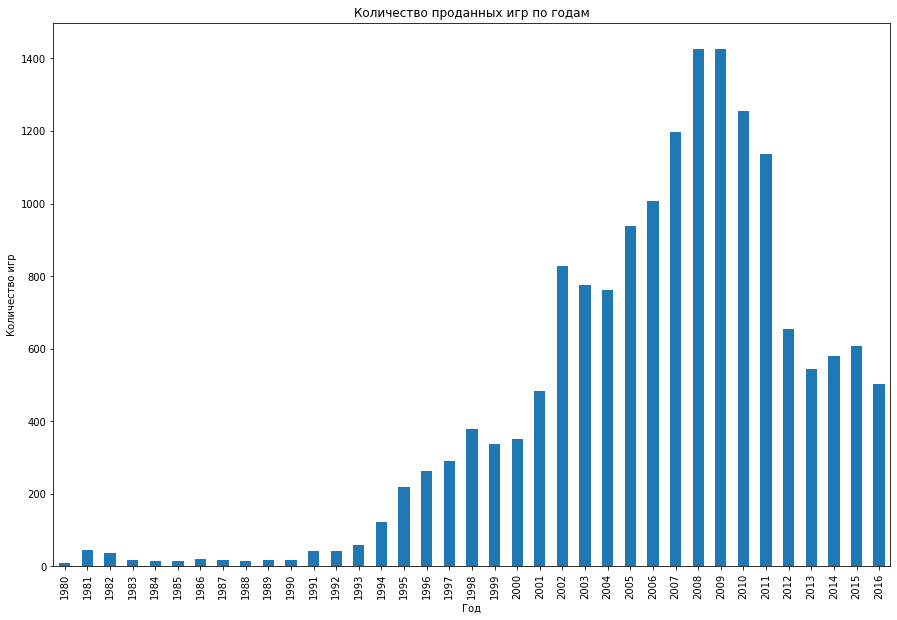

In [104]:
data.groupby('year_of_release')['name'].count().plot(kind = 'bar', figsize = (15, 10))
plt.title('Количество проданных игр по годам')
plt.ylabel('Количество игр')
plt.xlabel('Год');

По графику можно заметить, что заметный рост продаж наблюдается после 1994 года, в то время как в предыдущие года продавалось от 9 до 60 игр. Посмотрим сколько всего записей до 94 года.

In [105]:
min_sales = data.query('year_of_release < 1994').count()
min_sales['year_of_release']

365

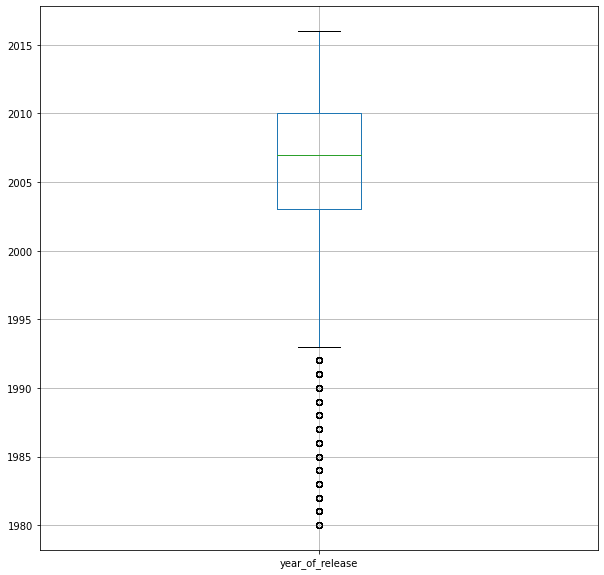

In [106]:
data.boxplot(column = ['year_of_release'], figsize = (10,10));

Значения до 94 года являются выбросами и их не очень много, поэтому их удаление минимально повлияет на общую картину.

In [107]:
data = data.query('year_of_release >= 1994')
data.describe().T

,count,mean,std,min,25%,50%,75%,max
year_of_release,16079.0,2006.918776,5.138981,1994.0,2003.00,2008.00,2011.00,2016.00
na_sales,16079.0,0.249924,0.715359,0.0,0.00,0.08,0.23,41.36
eu_sales,16079.0,0.145565,0.508146,0.0,0.00,0.02,0.11,28.96
jp_sales,16079.0,0.068677,0.282183,0.0,0.00,0.00,0.03,10.22
other_sales,16079.0,0.047940,0.189360,0.0,0.00,0.01,0.03,10.57
critic_score,7980.0,68.994236,13.920962,13.0,60.00,71.00,79.00,98.00
user_score,7460.0,7.127024,1.498533,0.0,6.40,7.50,8.20,9.70
sum_sales_on_regeons,16079.0,0.512105,1.470474,0.0,0.06,0.16,0.45,82.54


### Изменение продаж на платформах

Посмотреть, как менялись продажи по платформам. Выберать платформы с наибольшими суммарными продажами и построить распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

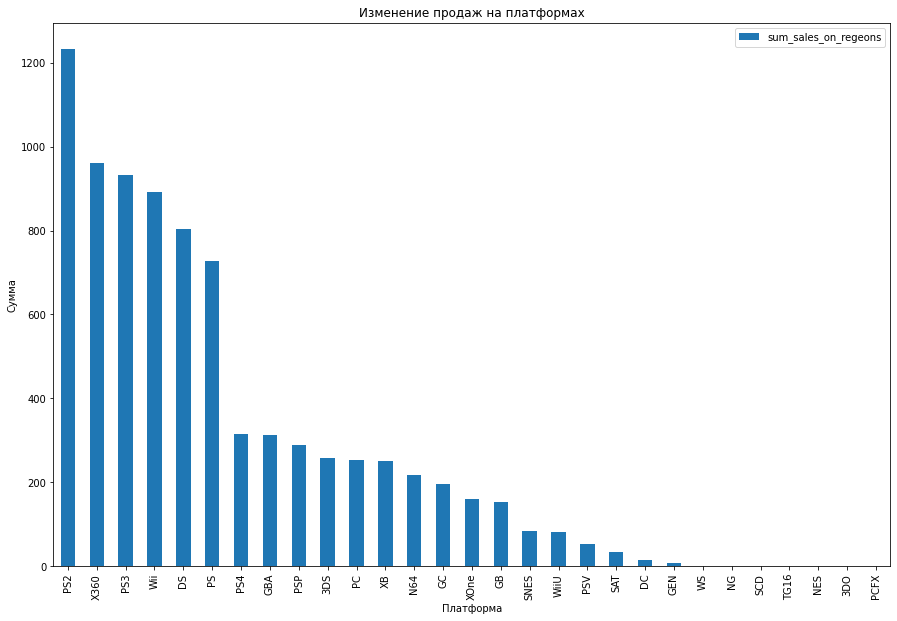

In [156]:
region_sales = data.pivot_table(index = 'platform', values = 'sum_sales_on_regeons', aggfunc = 'sum')
region_sales.sort_values(by = 'sum_sales_on_regeons', ascending = False).plot(
    kind = 'bar', 
    figsize = (15, 10)
)
plt.title('Изменение продаж на платформах')
plt.ylabel('Сумма')
plt.xlabel('Платформа');

По графику видно, что у 6 платформ имеются большие продажи. Выведем их с помощью сортировки.

In [109]:
region_sales = region_sales.sort_values(by = 'sum_sales_on_regeons', ascending = False).head(6)
region_sales

,sum_sales_on_regeons
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.76
PS,727.58


Построим графики распределения с помощью цикла.

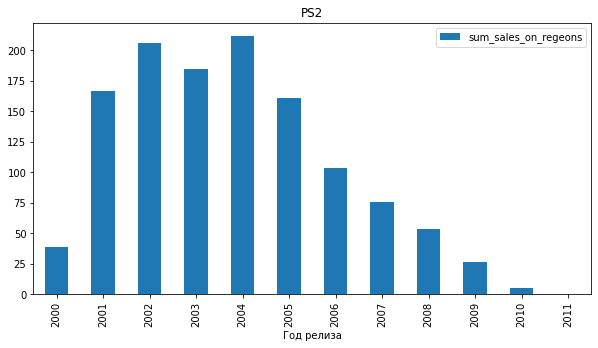

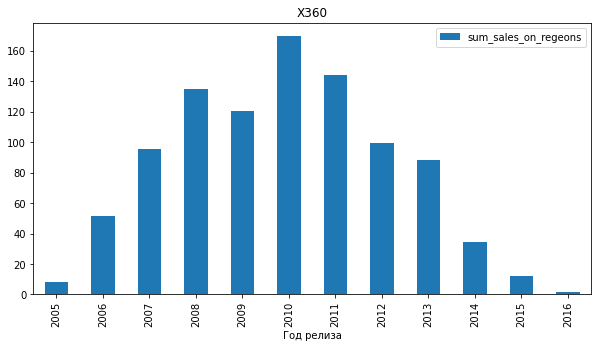

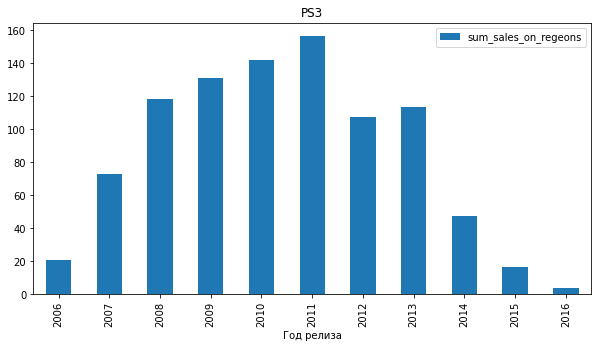

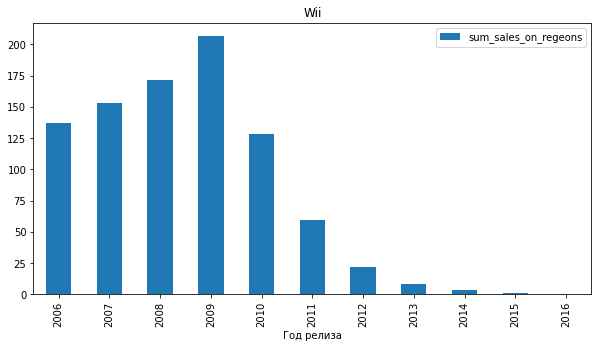

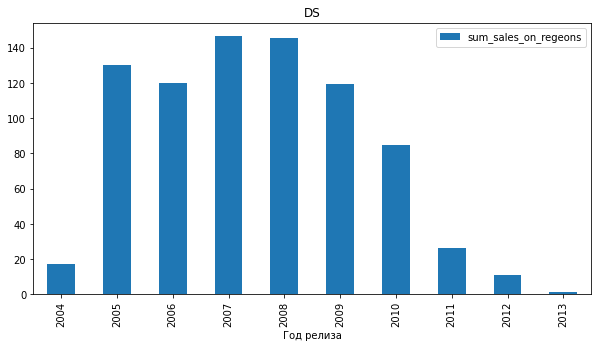

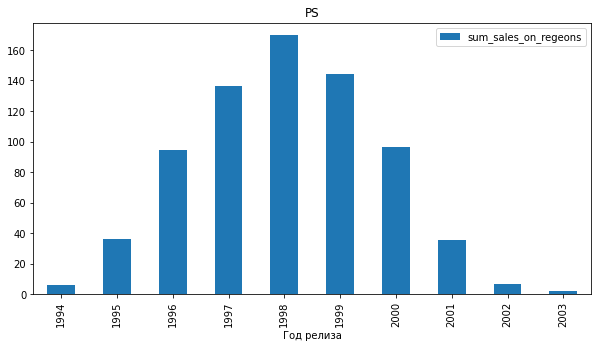

In [110]:
for item in region_sales.index:
    
    data.query('platform == @item').pivot_table(
        index = 'year_of_release',
        values = 'sum_sales_on_regeons',
        aggfunc = 'sum'
    ).plot(
        kind = 'bar', 
        figsize = (10, 5),
        title = item
    )
    plt.xlabel('Год релиза')
    plt.show()

Срок существования всех популярных платформ в среднем составляет 6-7 лет

### Прогноз на 2017 год

Для прогноза возьмем данные с 2014 года, т.к. это позволит отсеить уже исчезнувшие на тот момент платформы и сделать прогноз более точным.

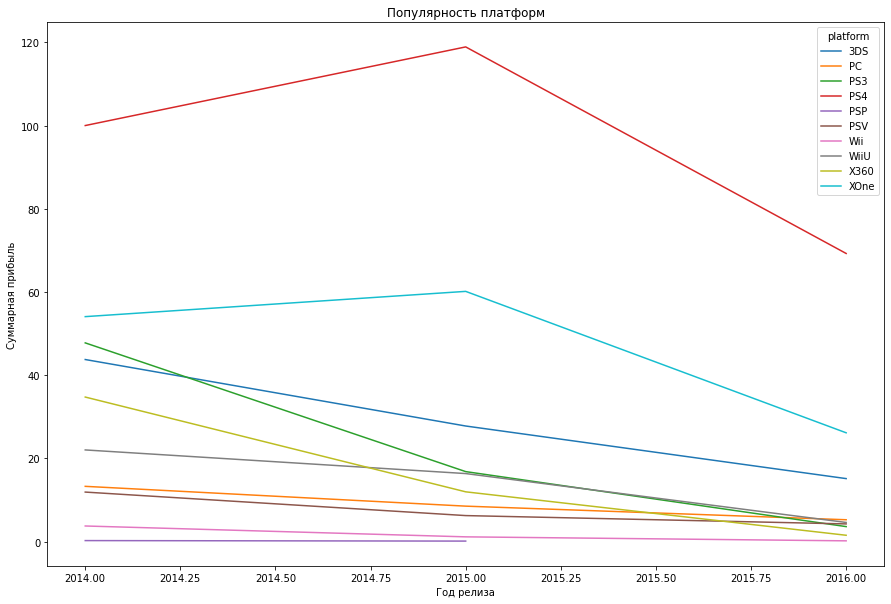

In [111]:
predict_table = data.query('year_of_release >= 2014').pivot_table(
    index = 'year_of_release', 
    columns = 'platform', 
    values = 'sum_sales_on_regeons', 
    aggfunc = 'sum'
)
predict_table.plot(
    figsize = (15, 10),
)
plt.title('Популярность платформ')
plt.ylabel('Cуммарная прибыль')
plt.xlabel('Год релиза');

С такими результатами прогноз на 2017 год не самый лучший, т.к. продажи на многих платформах начали падать к 2016 году.

### Лидирующие по продажам платформы

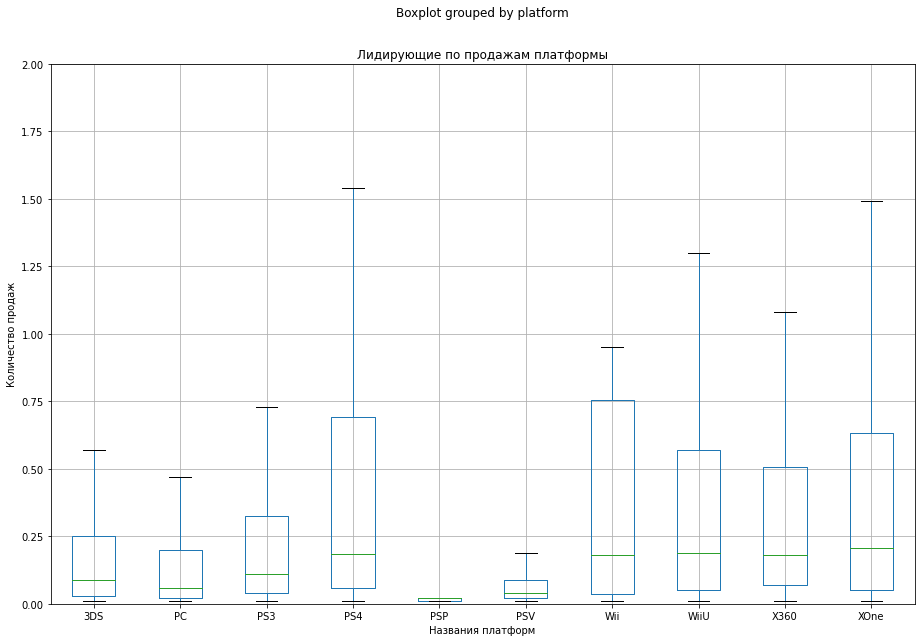

In [167]:
data.query('year_of_release >= 2014').boxplot(
    column = 'sum_sales_on_regeons',
    by = 'platform',
    figsize = (15,10),
    showfliers = False
)
plt.ylim(0, 2)
plt.title('Лидирующие по продажам платформы')
plt.xlabel('Названия платформ')
plt.ylabel('Количество продаж');

In [113]:
predict_table.describe()

platform,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
count,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000
mean,28.893333,9.016667,22.726667,96.050000,0.180000,7.466667,1.690000,14.326667,16.073333,46.786667
std,14.342445,4.037974,22.664795,25.059579,0.084853,3.967472,1.847458,8.889411,16.987694,18.127748
min,15.140000,5.250000,3.600000,69.250000,0.120000,4.250000,0.180000,4.600000,1.520000,26.150000
25%,21.460000,6.885000,10.210000,84.625000,0.150000,5.250000,0.660000,10.475000,6.740000,40.110000
50%,27.780000,8.520000,16.820000,100.000000,0.180000,6.250000,1.140000,16.350000,11.960000,54.070000
75%,35.770000,10.900000,32.290000,109.450000,0.210000,9.075000,2.445000,19.190000,23.350000,57.105000
max,43.760000,13.280000,47.760000,118.900000,0.240000,11.900000,3.750000,22.030000,34.740000,60.140000


На диаграмме видно, что самой прибыльной платформой является **PS4**:
 - Основные значения находятся в диапазоне от 84, до 109, а медиана равна 100. Максимум суммарных продаж достигает почти 120 и минимум имеет значение, которое превышает максимальное у остальных платформ.

На второе место можно поставить **XOne**:
 - Максимум(60) и медиана(54) также имеют большие значения, чем у других платформ, основные значенния лежат в диапазоне от 40 до 57. 

Ещё выеляются платформы PS3 и 3DS, но в предыдущем графике видно, что их популярность падает и, возможно, они исчезнут или суммарные продажи будут находится около нуля.

**На графике также выделяются платформы Wii и WiiU, но их не берем в рассмотрение, т.к. первая по показателям продаж находится стабильно около нуля, а вторая исчезла в 2015 году.**

### Влияние отзывов на продажи внутри одной платформы

Для анализа влияния отзывов на продажи возьмем также данные за 2014 год и три платформы:
1. PS4 на которой будем изучать наглядное влияние отзывов
2. XOne и 3DS для сравнения показателей

Для более достоверного результата исключим пропуски в стоблцах с оценкой пользователей и критиков

##### Платформа PS4

In [114]:
#создадим датасеты по платформе и году релиза, и уберем пропуски в столбце с оценкой критиков
critic_table_ps4 = data.query(
    'year_of_release >= 2014 and platform == "PS4"'
).dropna(subset = ['critic_score']).reset_index(drop = True)

#с оценкой пользователей
user_table_ps4 = data.query(
    'year_of_release >= 2014 and platform == "PS4"'
).dropna(subset = ['user_score']).reset_index(drop = True)

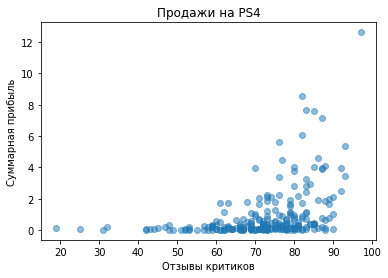

In [115]:
plt.scatter(
    x = 'critic_score',
    y = 'sum_sales_on_regeons',
    data = critic_table_ps4,
    alpha = 0.5
)
plt.title('Продажи на PS4')
plt.ylabel('Cуммарная прибыль')
plt.xlabel('Отзывы критиков');

In [116]:
print(round(critic_table_ps4['critic_score'].corr(critic_table_ps4['sum_sales_on_regeons']), 2))

0.4


По положительному значению корреляции Пирсона можно сделать вывод, что есть небольшая зависимость продаж от оценки критиков.

Чем выше оценка критиков, тем больше прибыли будет получено.

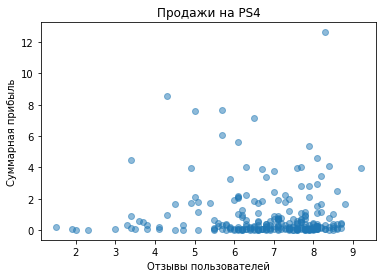

In [117]:
plt.scatter(
    x = 'user_score',
    y = 'sum_sales_on_regeons',
    data = user_table_ps4,
    alpha = 0.5
)
plt.title('Продажи на PS4')
plt.ylabel('Cуммарная прибыль')
plt.xlabel('Отзывы пользователей');

In [118]:
print(round(user_table_ps4['user_score'].corr(user_table_ps4['sum_sales_on_regeons']), 2))

-0.04


Корреляция имеет небольшое, но отрицательное значение, что может говороить о том, что величины почти не влияют друг на друга.

##### Платформа XOne <a id='intro'></a>

In [119]:
critic_table_xone = data.query(
    'year_of_release >= 2014 and platform == "XOne"'
).dropna(subset = ['critic_score']).reset_index(drop = True)

user_table_xone = data.query(
    'year_of_release >= 2014 and platform == "XOne"'
).dropna(subset = ['user_score']).reset_index(drop = True)

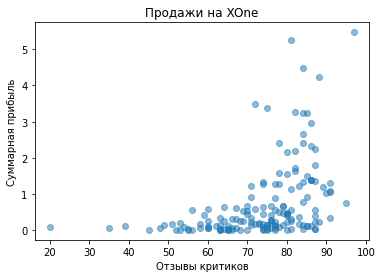

In [120]:
plt.scatter(
    x = 'critic_score',
    y = 'sum_sales_on_regeons',
    data = critic_table_xone,
    alpha = 0.5
)
plt.title('Продажи на XOne')
plt.ylabel('Cуммарная прибыль')
plt.xlabel('Отзывы критиков');

In [121]:
print(round(critic_table_xone['user_score'].corr(critic_table_xone['sum_sales_on_regeons']), 2))

-0.09


Отрицательное значение хоть и приближено к единице, но всеравно слишком мало, что указывает на отсутствие связи между рассматриваемыми показателями.

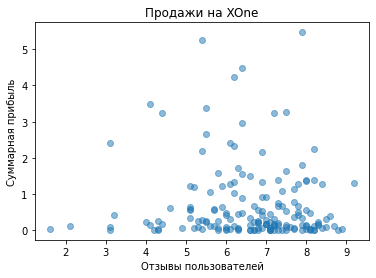

In [122]:
plt.scatter(
    x = 'user_score',
    y = 'sum_sales_on_regeons',
    data = user_table_xone,
    alpha = 0.5
)
plt.title('Продажи на XOne')
plt.ylabel('Cуммарная прибыль')
plt.xlabel('Отзывы пользователей');

In [123]:
print(round(user_table_xone['user_score'].corr(user_table_xone['sum_sales_on_regeons']), 2))

-0.07


Ситуация с пользователями повторяется.

##### Платформа 3DS

In [124]:
critic_table_3ds = data.query(
    'year_of_release >= 2014 and platform == "3DS"'
).dropna(subset = ['critic_score']).reset_index(drop = True)

user_table_3ds = data.query(
    'year_of_release >= 2014 and platform == "3DS"'
).dropna(subset = ['user_score']).reset_index(drop = True)

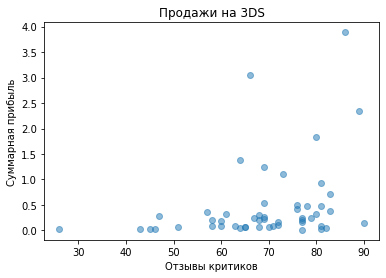

In [125]:
plt.scatter(
    x = 'critic_score',
    y = 'sum_sales_on_regeons',
    data = critic_table_3ds,
    alpha = 0.5
)
plt.title('Продажи на 3DS')
plt.ylabel('Cуммарная прибыль')
plt.xlabel('Отзывы критиков');

In [126]:
print(round(critic_table_3ds['critic_score'].corr(critic_table_3ds['sum_sales_on_regeons']), 2))

0.31


Здесь прослеживается небольшая положительная зависимость прибыли от оценки критиков - от положительных отзывов увеличивается прибыль.

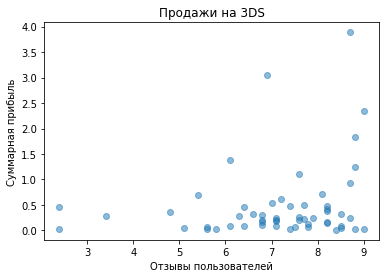

In [127]:
plt.scatter(
    x = 'user_score',
    y = 'sum_sales_on_regeons',
    data = user_table_3ds,
    alpha = 0.5
)
plt.title('Продажи на 3DS')
plt.ylabel('Cуммарная прибыль')
plt.xlabel('Отзывы пользователей');

In [128]:
print(round(user_table_3ds['user_score'].corr(user_table_3ds['sum_sales_on_regeons']), 2))

0.22


Есть очень малая зависимость, что прибыль будет увеличиваться от отзывов.

На продажи платформы PS4 имеют небольшое влияние отзывы критиков, пользователи на показатели никак не влияют. На другой платформе XOne на прибыль отзывы не влияют, а на 3DS напротив, критики и пользователи имеют некоторое влияние на продажи.

### Распределение игр по жанрам

Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

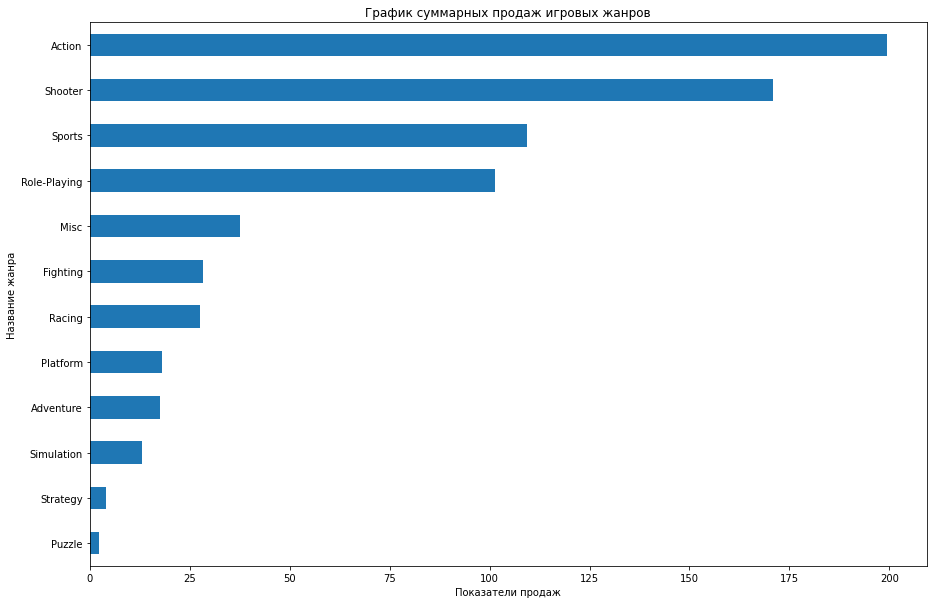

In [174]:
genre_data = data.query('year_of_release >= 2014').groupby('genre')['sum_sales_on_regeons'].sum()
genre_data.sort_values().plot(kind = 'barh', figsize = (15,10));
plt.title('График суммарных продаж игровых жанров')
plt.ylabel('Название жанра')
plt.xlabel('Показатели продаж');

Для более точного распределения рассмотрим средние и медианные продажи.

Выведем рейтинг по средним показателям продаж.

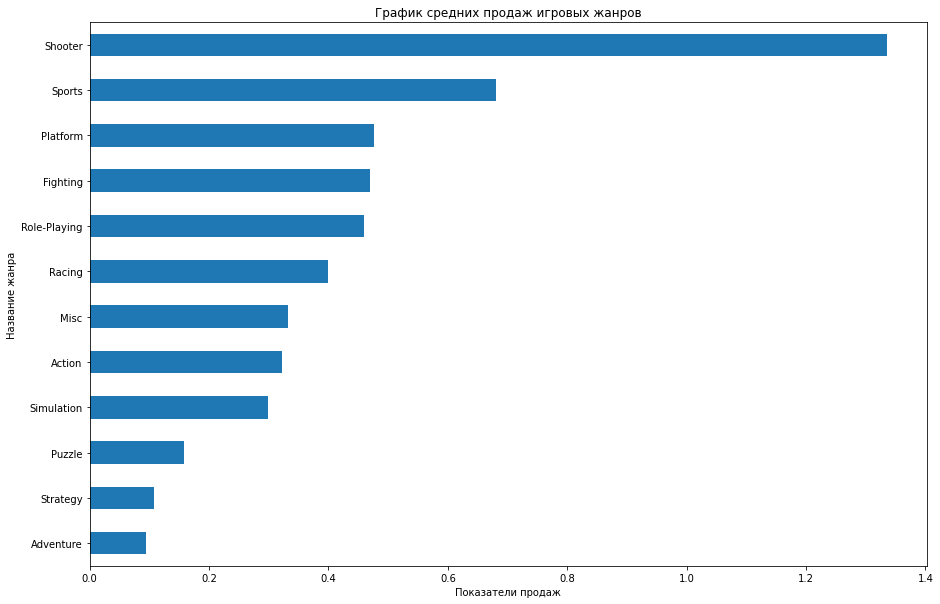

In [169]:
genre_data = data.query('year_of_release >= 2014').groupby('genre')['sum_sales_on_regeons'].mean()
genre_data.sort_values().plot(kind = 'barh', figsize = (15,10));
plt.title('График средних продаж игровых жанров')
plt.ylabel('Название жанра')
plt.xlabel('Показатели продаж');

Теперь рассмотрим медианные продажи.

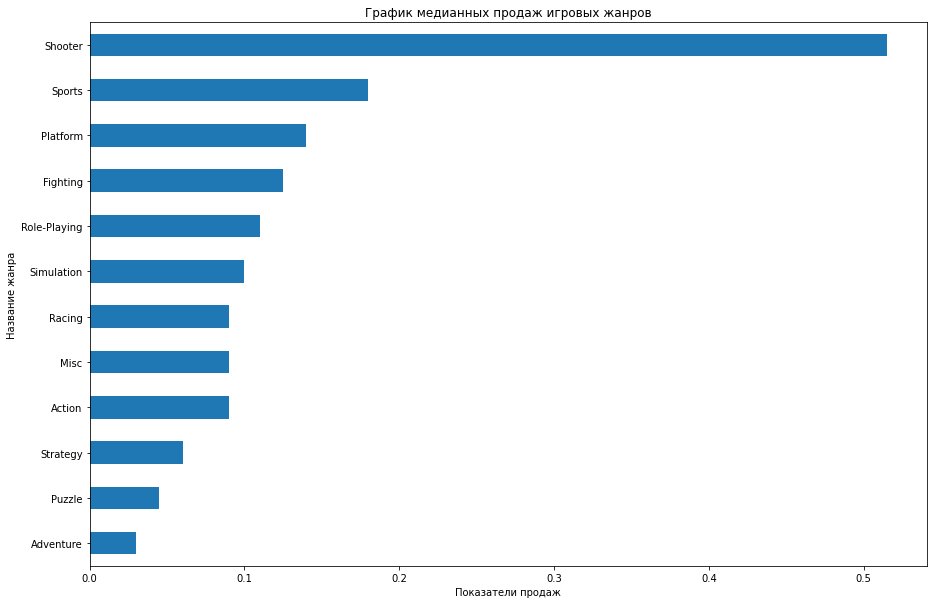

In [171]:
genre_data = data.query('year_of_release >= 2014').groupby('genre')['sum_sales_on_regeons'].median()
genre_data.sort_values().plot(kind = 'barh', figsize = (15,10));
plt.title('График медианных продаж игровых жанров')
plt.ylabel('Название жанра')
plt.xlabel('Показатели продаж');

Рассмотрим жанры с самыми высокими суммарными, средними и медианными продажами.

In [183]:
genre_data = data.pivot_table(index = 'genre', values = 'sum_sales_on_regeons', aggfunc = ('sum', 'mean', 'median'))
genre_data.sort_values(by = 'sum', ascending = False).query('genre in ["Action", "Shooter", "Sports"]')

,mean,median,sum
genre,,,
Action,0.510422,0.18,1646.62
Sports,0.560504,0.22,1266.74
Shooter,0.776025,0.23,976.24


По суммарным продажам самые популярные жанры экшн и шутер, но по остальным показателям шутеры и спортивные игры оказались популярнее, поэтому выделим топ-3 популярных жанра:
 1. Shooter
 2. Sports
 3. Action

И жанры с самыми низкими продажами.

In [184]:
genre_data.sort_values(by = 'sum', ascending = False).query('genre in ["Adventure", "Puzzle", "Strategy"]')

,mean,median,sum
genre,,,
Adventure,0.166659,0.05,213.99
Strategy,0.256702,0.10,170.45
Puzzle,0.298321,0.09,159.90


По суммарным продажам самый непродаваемый жанр - головоломка, по медианным и средним - приключение, стратегия занимает второе место. Топ-3 непопулярных жанра:
 1. Adventure
 2. Strategy
 3. Puzzle

## Портреты пользователей каждого региона

Возьмем данные с 2014 по 2016 года. Создадим таблицы для каждого региона с суммарными продажами на платформах.

### Топ-5 популярных платформ

In [132]:
na_data = data.query('year_of_release >= 2014').pivot_table(
    index = 'platform',
    values = 'na_sales',
    aggfunc = 'sum'
)
eu_data = data.query('year_of_release >= 2014').pivot_table(
    index = 'platform',
    values = 'eu_sales',
    aggfunc = 'sum'
)
jp_data = data.query('year_of_release >= 2014').pivot_table(
    index = 'platform',
    values = 'jp_sales',
    aggfunc = 'sum'
)

##### Северная Америка

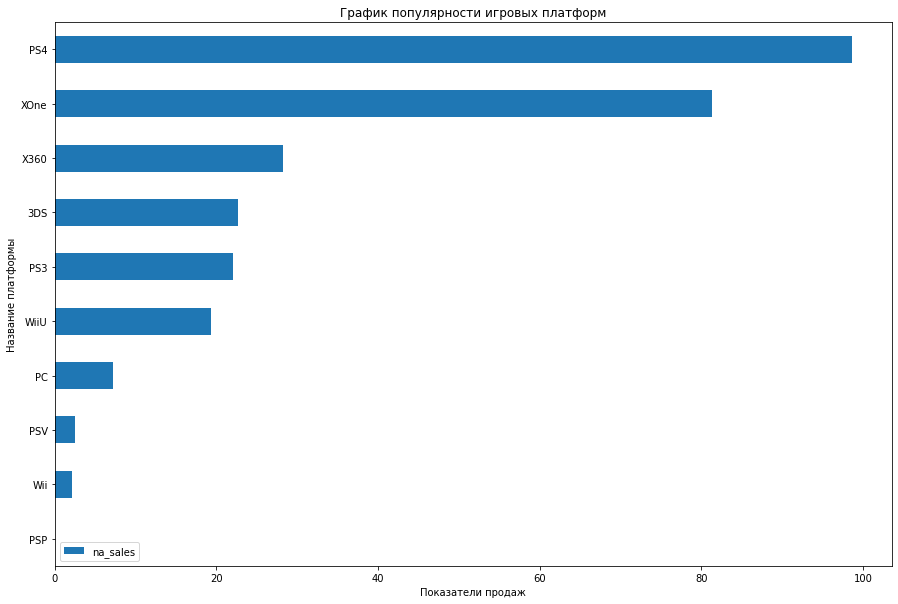

In [133]:
na_data.sort_values(by = 'na_sales').plot(
    kind = 'barh',
    figsize = (15, 10)
)
plt.title('График популярности игровых платформ')
plt.ylabel('Название платформы')
plt.xlabel('Показатели продаж');

In [134]:
na_data.sort_values(by = 'na_sales', ascending = False).head(5)

,na_sales
platform,
PS4,98.61
XOne,81.27
X360,28.30
3DS,22.64
PS3,22.05


##### Европа

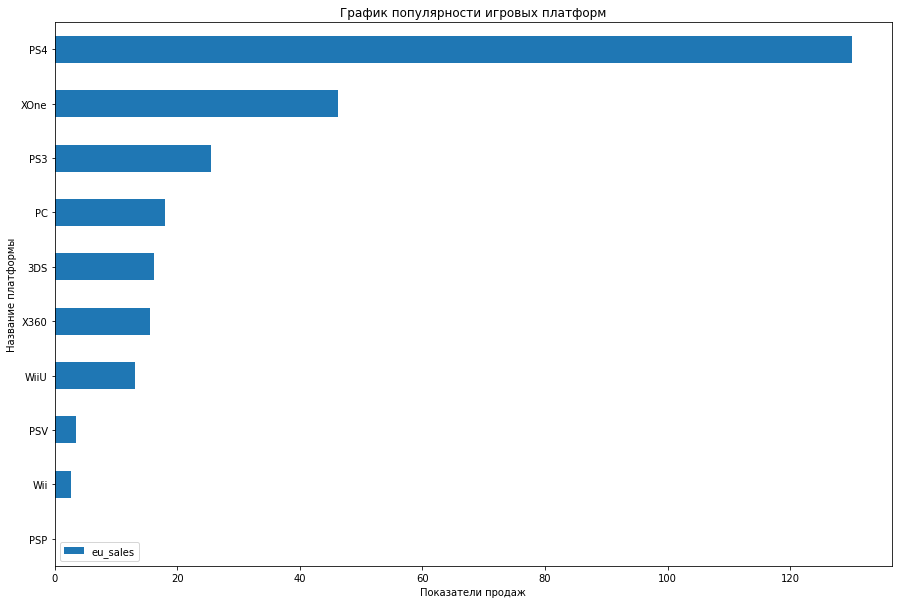

In [135]:
eu_data.sort_values(by = 'eu_sales').plot(
    kind = 'barh',
    figsize = (15, 10)
)
plt.title('График популярности игровых платформ')
plt.ylabel('Название платформы')
plt.xlabel('Показатели продаж');

In [136]:
eu_data.sort_values(by = 'eu_sales', ascending = False).head(5)

,eu_sales
platform,
PS4,130.04
XOne,46.25
PS3,25.54
PC,17.97
3DS,16.12


##### Япония

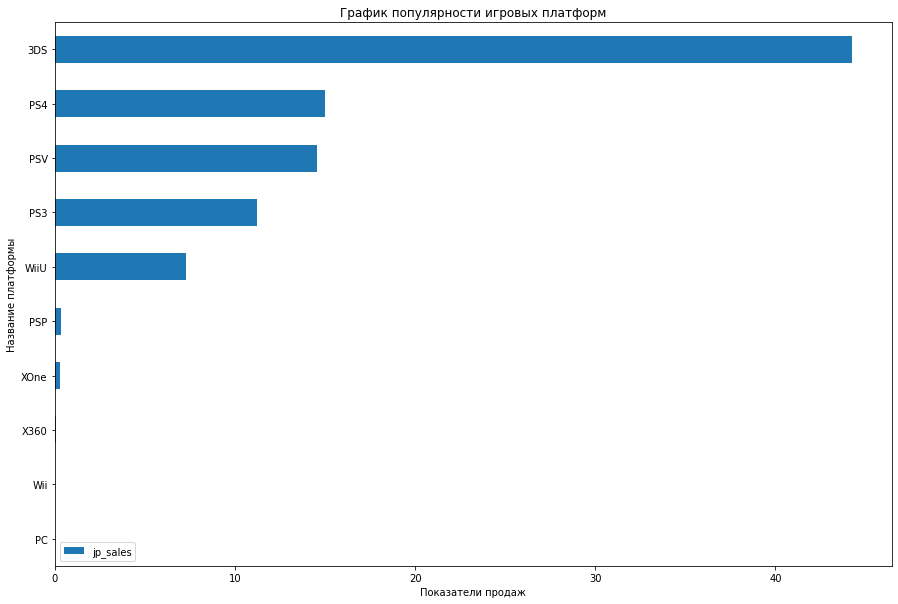

In [137]:
jp_data.sort_values(by = 'jp_sales').plot(
    kind = 'barh',
    figsize = (15, 10)
)
plt.title('График популярности игровых платформ')
plt.ylabel('Название платформы')
plt.xlabel('Показатели продаж');

In [138]:
jp_data.sort_values(by = 'jp_sales', ascending = False).head(5)

,jp_sales
platform,
3DS,44.24
PS4,15.02
PSV,14.54
PS3,11.22
WiiU,7.31


В Европе и Северной Америке по продажам лидируют: на первом месте в списке топ-5 PS4 и на втором XOne, в Японии 3DS оказалась более популярна, чем PS4, видимо в этой стране игровым приставкам предпочитали портативные игровые системы.

### Топ-5 популярных жанров игр

In [139]:
na_data = data.query('year_of_release >= 2014').pivot_table(
    index = 'genre',
    values = 'na_sales',
    aggfunc = 'sum'
)
eu_data = data.query('year_of_release >= 2014').pivot_table(
    index = 'genre',
    values = 'eu_sales',
    aggfunc = 'sum'
)
jp_data = data.query('year_of_release >= 2014').pivot_table(
    index = 'genre',
    values = 'jp_sales',
    aggfunc = 'sum'
)

##### Северная Америка

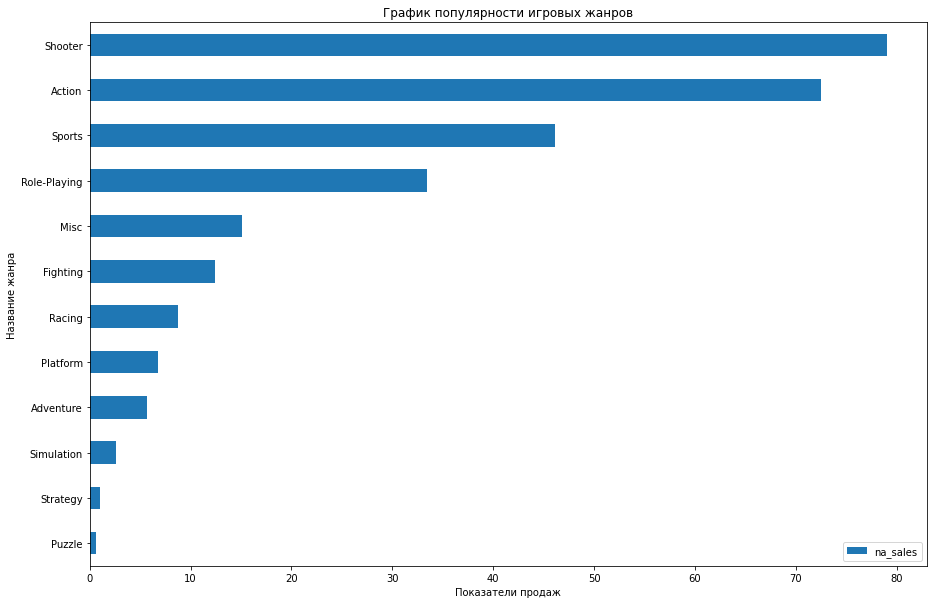

In [140]:
na_data.sort_values(by = 'na_sales').plot(
    kind = 'barh',
    figsize = (15, 10)
)
plt.title('График популярности игровых жанров')
plt.ylabel('Название жанра')
plt.xlabel('Показатели продаж');

In [141]:
na_data.sort_values(by = 'na_sales', ascending = False).head(5)

,na_sales
genre,
Shooter,79.02
Action,72.53
Sports,46.13
Role-Playing,33.47
Misc,15.05


##### Европа

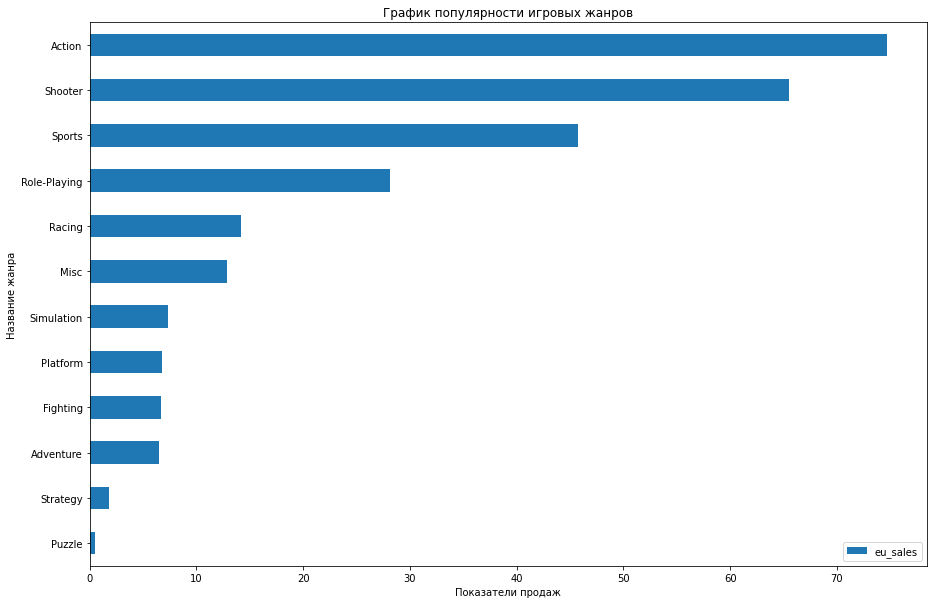

In [142]:
eu_data.sort_values(by = 'eu_sales').plot(
    kind = 'barh',
    figsize = (15, 10)
)
plt.title('График популярности игровых жанров')
plt.ylabel('Название жанра')
plt.xlabel('Показатели продаж');

In [143]:
eu_data.sort_values(by = 'eu_sales', ascending = False).head()

,eu_sales
genre,
Action,74.68
Shooter,65.52
Sports,45.73
Role-Playing,28.17
Racing,14.13


##### Япония

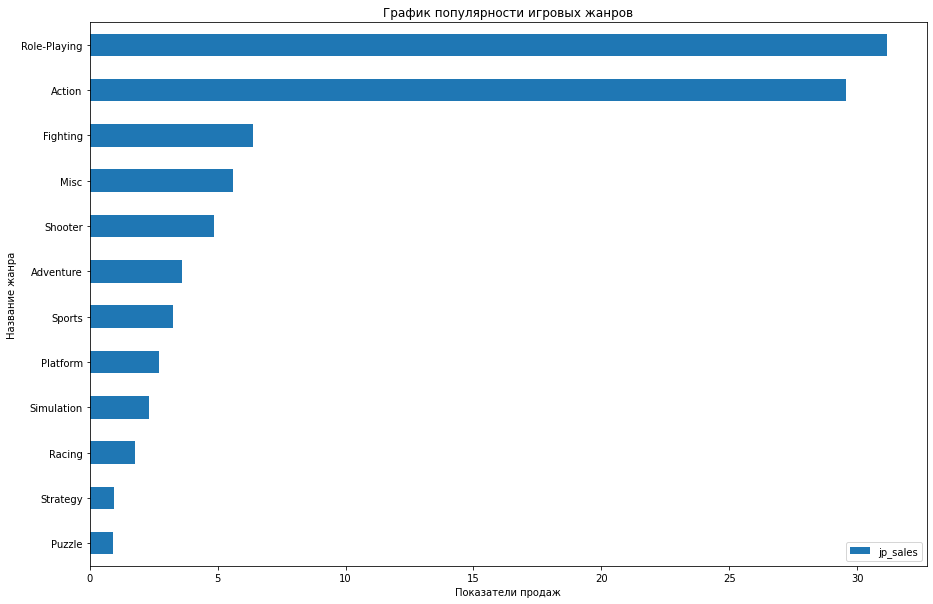

In [144]:
jp_data.sort_values(by = 'jp_sales').plot(
    kind = 'barh',
    figsize = (15, 10)
)
plt.title('График популярности игровых жанров')
plt.ylabel('Название жанра')
plt.xlabel('Показатели продаж');

In [145]:
jp_data.sort_values(by = 'jp_sales', ascending = False).head(5)

,jp_sales
genre,
Role-Playing,31.16
Action,29.58
Fighting,6.37
Misc,5.61
Shooter,4.87


В Северной Америке самым популярным игровым жанром является шутер, на втором месте стоят экшн-игры и третье занимают спортивные;

В Европе ситуация похожая, только игры жанра экшн сместили шутеры на второе место; 

В Японии большую популярность получили ролевые игры, шутеры также остались на втором месте, а на третьем оказались игры в жанре файтинг.

### Влияние рейтинга ESRB на продажи в отдельном регионе

In [146]:
na_data = data.query('year_of_release >= 2014 and rating != "undef"').pivot_table(
    index = 'rating',
    values = 'na_sales',
    aggfunc = 'sum'
)
eu_data = data.query('year_of_release >= 2014 and rating != "undef"').pivot_table(
    index = 'rating',
    values = 'eu_sales',
    aggfunc = 'sum'
)
jp_data = data.query('year_of_release >= 2014 and rating != "undef"').pivot_table(
    index = 'rating',
    values = 'jp_sales',
    aggfunc = 'sum'
)

##### Северная Америка

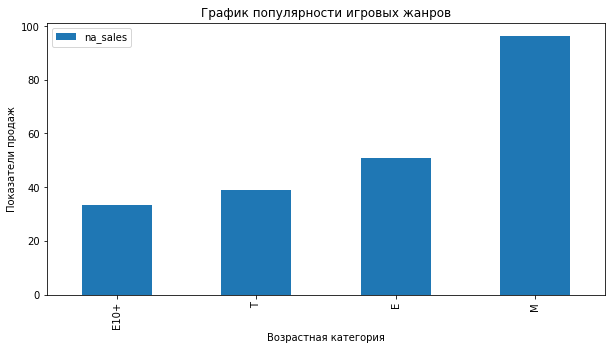

In [147]:
na_data.sort_values(by = 'na_sales').plot(
    kind = 'bar',
    figsize = (10, 5)
)
plt.title('График популярности игровых жанров')
plt.ylabel('Показатели продаж')
plt.xlabel('Возрастная категория');

In [148]:
na_data.sort_values(by = 'na_sales', ascending = False).head(5)

,na_sales
rating,
M,96.42
E,50.74
T,38.95
E10+,33.23


##### Европа

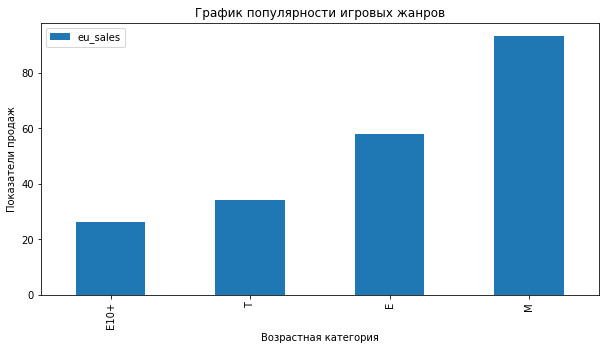

In [149]:
eu_data.sort_values(by = 'eu_sales').plot(
    kind = 'bar',
    figsize = (10, 5)
)
plt.title('График популярности игровых жанров')
plt.ylabel('Показатели продаж')
plt.xlabel('Возрастная категория');

In [150]:
eu_data.sort_values(by = 'eu_sales', ascending = False).head(5)

,eu_sales
rating,
M,93.44
E,58.06
T,34.07
E10+,26.16


##### Япония

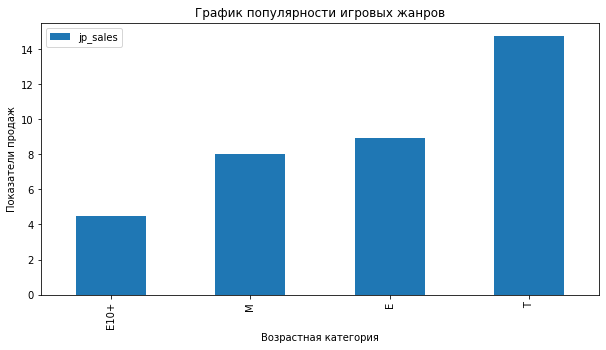

In [151]:
jp_data.sort_values(by = 'jp_sales').plot(
    kind = 'bar',
    figsize = (10, 5)
)
plt.title('График популярности игровых жанров')
plt.ylabel('Показатели продаж')
plt.xlabel('Возрастная категория');

In [152]:
jp_data.sort_values(by = 'jp_sales', ascending = False).head(5)

,jp_sales
rating,
T,14.78
E,8.94
M,8.01
E10+,4.46


Для начала расшифруем возрастные категории:

 - «E» («Everyone») — «Для всех»
 - «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
 - «T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет.
 - «M» («Mature») — «Для взрослых»: Материалы игры не подходят для лиц младше 17 лет.
 
В Европе и Северной Америке на первом месте по продажам стоят игры категории М, второе занмает категория Е - более предпочтительны категории игр для лиц старше 17 лет или которые подходят под любой возраст. В Японии же более предпочтительной категорией игр оказалась Т - игры для лиц от 13 и второе место занмает та же категория, что в предыдущих рассмотренных странах. 

## Проверка гипотез

Параметр **alpha** укажем равным 0.05

### Гипотеза 1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Н0: Средние пользовательские рейтинги платформ Xbox One и PC равны

Н1: Средние пользовательские рейтинги платформ Xbox One и PC не равны

Для проверки двух независимых выборок будем использовать гипотезу о равенстве средних двух генеральных совокупностей. Будем проверять двустороннюю гипотезу, т.к. вопрос состоит в том, одинаковые средние пользовательские рейтинги или нет. Также укажем, что дисперсии не равны, потому что при проверке платформ в пункте [3.5.2](#intro) замечен большой разброс значений.

In [153]:
#сделаем срез, чтобы избавиться от остальных платформ и пропусков
user_table_pc = data.query(
    'year_of_release >= 2014 and platform == "PC"'
).dropna(subset = ['user_score']).reset_index(drop = True)
user_table_xone = data.query(
    'year_of_release >= 2014 and platform == "XOne"'
).dropna(subset = ['user_score']).reset_index(drop = True)

#пользовательский рейтинг для платформы PC
platform_pc = user_table_pc['user_score']
#для Xbox One
platform_xone = user_table_xone['user_score']

alpha = 0.05

result = st.ttest_ind(
    platform_xone,
    platform_pc,
    equal_var = False
)

print('p - значение', result.pvalue)
print()
if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

p - значение 0.11601398086668832

Не отвергаем нулевую гипотезу


В результате проверки нулевая гипотеза не отвергается, потому что средние пользовательские рейтинги платформ  Xbox One и PC равны. О достоверности проверки может говорить p-значение(0,12), которое выше уровня статистической значимости(0,05)

### Гипотеза 2. Средние пользовательские рейтинги жанров Action и Sports разные.

Н0: Средние пользовательские рейтинги жанров Action и Sports не равны

Н1: Средние пользовательские рейтинги жанров Action и Sports равны

Для проверки данных гипотез будем использовать тот же метод и параметры, что в предыдущем пункте, т.к. здесь также присутствуют две независимые выборки и будет проверяться двусторонняя гипотеза.

In [154]:
#сделаем срез, чтобы избавиться от остальных платформ и пропусков
user_table_action = data.query(
    'year_of_release >= 2014 and genre == "Action"'
).dropna(subset = ['user_score']).reset_index(drop = True)
user_table_sports = data.query(
    'year_of_release >= 2014 and genre == "Sports"'
).dropna(subset = ['user_score']).reset_index(drop = True)

#пользовательский рейтинг для платформы PC
action = user_table_action['user_score']
#для Xbox One
sports = user_table_sports['user_score']

alpha = 0.05

result = st.ttest_ind(
    action,
    sports,
    equal_var = False
)

print('p - значение', result.pvalue)
print()
if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

p - значение 1.1825550382644557e-14

Отвергаем нулевую гипотезу


После нулевая гипотеза была отвергнута в пользу первой, поэтому можно утверждать, что средние пользовательские рейтинги жанров Action и Sports одинаковые.

## Общий вывод

При анализе игрового магазина были изучены таблицы и выявлены следующие проблемы:
 - малочисленные пропуски в колонках: name, genre, year_of_release
 - много отсутствующих значений в столбцах: critic_score, user_score, rating
 - несоответствие типов данных в стодбцах: year_of_release, user_score
 - значения tbd в столбце с пользовательской оценкой

В результате обработки данных были устранены пропуски из столбцов name, genre, year_of_release, заменены значения NaN на undef в rating. Приведены к коррекному типу данных описанные выше столбцы. При проверке не обнаружено явных и неявных дубликатов.

При анализе было сокращено количество значений в столбце year_of_release до 1994 года, но для дальнейшей работы использовались данные с 2014 по 2016 год.

Также выявлено, что на продажи влияют следуюшие факторы:
 - Отзывы критиков
 - Год выпуска платформы
 - Популярность платформы у пользователей. По сравнению рейтингов из трех регионов можно выделить топ-3 самых популярных платформ:
     1. XOne
     2. PS4
     3. 3DS
 - Популярные жанры:
     1. Action
     2. Sports
     3. Shooter
 - Рейтинг ESRB:
     1. E
     2. M
     3. T

После проверки гипотез было выявлено, что средние пользовательские рейтинги одинаковы у платформ Xbox One и PC, то же можно сказать и о средних пользовательских рейтингах у жанров Action и Sports.